In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Datasets/creditcard.csv')
df.iloc[:,:-1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


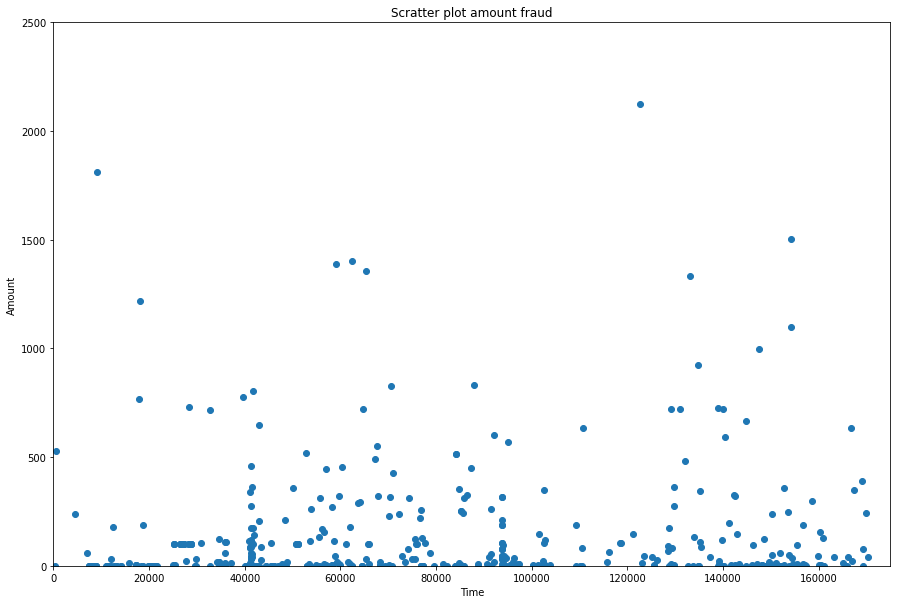

In [3]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

Pointers -
- Time does not affect the frequency of frauds
- Majority of the frauds are for smaller amounts

## Unbalanced data

In [4]:
number_fraud = len(df[df['Class'] == 1])
number_nonfraud = len(df[df['Class'] == 0])
print("Frauds =",number_fraud)
print("Not Frauds =",number_nonfraud)

Frauds = 492
Not Frauds = 284315


This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud

In [5]:
#On labelling everything as non fraud -
print("Accuracy would be =",str((number_nonfraud-number_fraud)/number_nonfraud))

Accuracy would be = 0.998269524998681


To answer this problem we could use the oversampling principle or the undersampling principle The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.

In [6]:
df_corr = df.corr()

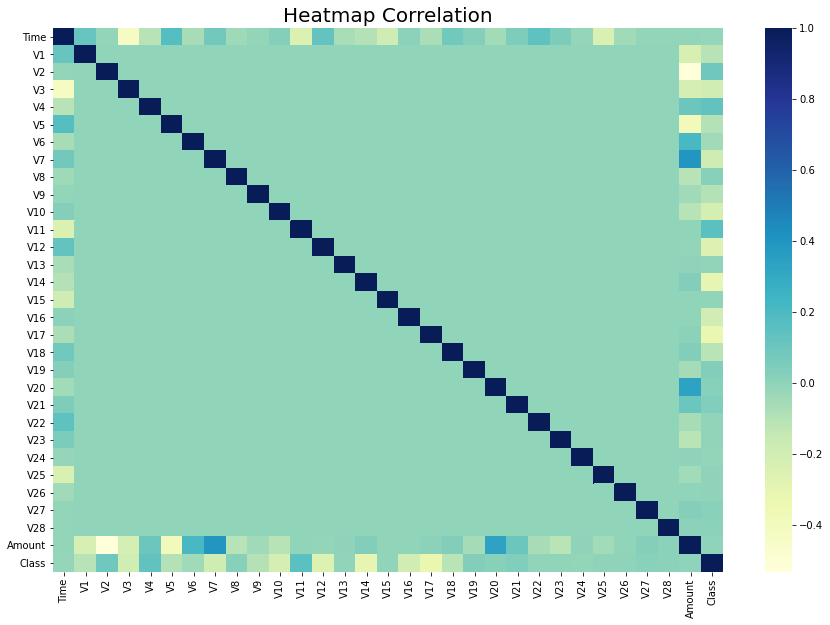

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap='YlGnBu')

plt.title('Heatmap Correlation',fontsize = 20)
plt.show()

As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA was previously performed on the data.

What can generally be done on a massive dataset is a dimension reduction. By picking th emost important dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly

In [8]:
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [9]:
df_corr.drop('Class',axis=0)
df_rank = pd.DataFrame(data=df_corr['Class'])
df_rank = np.abs(df_rank).sort_values(by="Class", ascending = False)
df_rank.dropna(inplace = True)

# Data Selection
## Oversampling

One way to do oversampling is to replicate the under-represented class tuples until we attain a correct proportion between the class

However as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled training data (for those using the undersampling principle if results are really bad just rerun the training dataset definition), we will undersample the data

## Undersampling

In [10]:
df_fraud = df[:150000]
df_fraud = df_fraud[df_fraud['Class'] == 1].sample(frac=1)
df_notfraud = df[:150000]
df_notfraud = df_notfraud[df_notfraud['Class'] == 0].sample(frac=1)

df_notfraudsample =  df_notfraud[:df_fraud.shape[0]]
df_train = pd.concat([df_notfraudsample,df_fraud]).sample(frac=1)

Xtrain = df_train.drop(['Time','Class'] , axis = 1).values
ytrain = df_train['Class'].values

In [11]:
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1).values
y_test_all = df_test_all['Class'].values

## Using SVM

In [12]:
classifier = svm.SVC(kernel='poly')
classifier.fit(Xtrain,ytrain)

SVC(kernel='poly')

In [13]:
ypred = classifier.predict(X_test_all)

In [14]:
cm = confusion_matrix(y_test_all, ypred)
print(cm)

[[133850    758]
 [   180     19]]


After ranking

In [15]:
j_recall = 0
j_precision = 0
max_recall = 0
max_precision = 0
for i in range(27):
    X_train_rank = df_train[df_rank.index[1:i+2]].values
    X_test_all = df_test_all[df_rank.index[1:i+2]].values
    y_test_all = df_test_all['Class'].values
    classifier1 = svm.SVC(kernel='linear')
    classifier1.fit(X_train_rank,ytrain)
    ypred = classifier1.predict(X_test_all)
    cm = confusion_matrix(y_test_all,ypred)
    r=recall_score(y_test_all,ypred)
    p=precision_score(y_test_all,ypred)
    if(r>max_recall):
        max_recall = r
        j_recall = i+1
    if(r>max_precision):
        max_precision = p
        j_precision = i+1


In [16]:
print('Max Precision at',j_precision,' position with precision =',max_precision)
print('Max Recall at',j_recall,' position with recall =',max_recall)

Max Precision at 21  position with precision = 0.9338842975206612
Max Recall at 7  position with recall = 0.9195979899497487


In [17]:
X_train_rank = df_train[df_rank.index[1:j_recall+1]].values
X_test_all = df_test_all[df_rank.index[1:j_recall+1]].values
y_test_all = df_test_all['Class'].values
classifier1 = svm.SVC(kernel='poly')
classifier1.fit(X_train_rank,ytrain)
ypred = classifier1.predict(X_test_all)
cm = confusion_matrix(y_test_all,ypred)
print(cm)
print(classification_report(y_test_all,ypred))

[[134537     71]
 [    42    157]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    134608
           1       0.69      0.79      0.74       199

    accuracy                           1.00    134807
   macro avg       0.84      0.89      0.87    134807
weighted avg       1.00      1.00      1.00    134807



# Re-balanced class weights

In this previously used SVM model, the weight of each class was the same, which means that missing a fraud is as bad as misjudging a non-fraud. The objective, for a bank, is to maximize the number of detected frauds! Even if it means considering more non-fraud tuple as fraudulent operation. So, we need to minimize the False positives : the number of no detected frauds.

Indeed, by modifying the class_weight parameter, we can chose which class to give more importance during the training phase. In this case, the class_1 which describes the fraudulent operations will be considered more important than the class_0 (non-fraud operation). However, in this case we will give more importance to the class_0 due to the large number of misclassed non-fraud operation. Of course the goal is to lose as little effective fraud as possible in the process.

In [30]:
classifier_b = svm.SVC(kernel = 'poly', class_weight={0:0.6,1:0.4})
classifier_b.fit(X_train_rank,ytrain)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='poly')

In [31]:
ypred = classifier_b.predict(X_test_all)
cm = confusion_matrix(y_test_all,ypred)
print(cm)
print(classification_report(y_test_all,ypred))
print('Recall Score =',recall_score(y_test_all,ypred))
print('Precision Score =',precision_score(y_test_all,ypred))

[[134569     39]
 [    46    153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    134608
           1       0.80      0.77      0.78       199

    accuracy                           1.00    134807
   macro avg       0.90      0.88      0.89    134807
weighted avg       1.00      1.00      1.00    134807

Recall Score = 0.7688442211055276
Precision Score = 0.796875
